# Markov Chains and Hidden Markov Models (MACS 30200)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), May 2019
The code in this Jupyter notebook was written using Python 3.7.

## 1. QuantEcon Markov notebook
See QuantEcon notebook on [Finite Markov Chains](https://lectures.quantecon.org/py/finite_markov.html).

## 2. Discrete diagrams, Markov processes, and interpretations

### 2.1. 2-state systems
Assume that you can have two types of day in period $t$: $x_{1,t}$= good day, $x_{2,t}$= bad day.

$$ X_t = [x_{1,t}, x_{2,t}] $$

What are some interpretations of this $X_t$ vector? What values can its entries take on? What might those values mean?

Let's further assume that the probability of tomorrow being a good day given that today is a good day $Pr(x_{1,t+1}|x_{1,t}) = \pi_{1,1}$. Because there is only one other outcome that tomorrow can have, then we know that the probability of tomorrow being a bad day given that today is a good day is $Pr(x_{2,t+1}|x_{1,t}) = 1 - \pi_{1,1}$.

We could also assume some different probabilities for the quality of tomorrow's day if today is a bad day. If we assume that the probability of tomorrow being a bad day given that today is a bad day is $Pr(x_{2,t+1}|x_{2,t}) = \pi_{2,2}$, then there is only one other outcome that tomorrow can have and we know that the probability of tomorrow being a good day given that today is a bad day is $Pr(x_{2,t+1}|x_{2,t}) = 1 - \pi_{2,2}$.

How might we simulate the time series of a person's quality of days $X_t$? How might we interpret the results? How important are the assumed probabilities $\pi_{j,k}$?

Let's construct a transition matrix $P$ that lists all the assumed probabilities from the previous paragraph in a particular way and has typical element $\pi_{j,k}$.

$$ P = \begin{bmatrix} \pi_{1,1} & 1 - \pi_{1,1} \\
                     1 - \pi_{2,2} & \pi_{2,2} \end{bmatrix} $$

What does the following equation or law of motion mean?

$$ X_{t+1} = P^T X_t \quad\Rightarrow\quad \begin{bmatrix}x_{1,t+1} \\ x_{2,t+1}\end{bmatrix} = \begin{bmatrix} \pi_{1,1} & 1 - \pi_{2,2} \\
                1 - \pi_{1,1} & \pi_{2,2} \end{bmatrix}\begin{bmatrix} x_{1,t} \\ x_{2,t}\end{bmatrix} $$

In [ ]:
import numpy as np

pi_11 = 0.5
pi_22 = 0.7
P = np.array([[pi_11, 1 - pi_11], [1 - pi_22, pi_22]])
print(P)
print()
print(P.T)

In [ ]:
# What if today is a good day?
X_t = np.array([[0.9], [0.1]])  # Make a 2 x 1 vector
X_tp1 = np.dot(P.T, X_t)
print(X_tp1)

How do we interpret this vector for $X_{t+1}$ from a current period vector $X_t$ in which today was a good day? These represent the number of people

How would we interpret $X_{t+2}$ as a function of (or going from or transitioning from) $X_{t+1}$?

In [ ]:
X_tp2 = np.dot(P.T, X_tp1)
print(X_tp2)

How does this look if I do it a bunch of times? What do you predict for $x_{1,t+u}$ and for $x_{2,t+u}$?

In [ ]:
Sims = 25
X_0_good = np.array([[0.9], [0.1]])
Xmat = np.zeros((Sims, 2))
Xmat[0, :] = X_0_good.flatten()

X_t = X_0_good
for sim in range(1, Sims):
    X_tp1 = np.dot(P.T, X_t)
    Xmat[sim, :] = X_tp1.flatten()
    X_t = X_tp1

print(Xmat)

Is there a way to know what any row of that `Xmat` matrix is with one line of code using only the initial distribution `X_0` and the transition matrix `P` rather than the whole `for` loop?

In [ ]:
import numpy.linalg as LA

x_row_u = np.dot(LA.matrix_power(P.T, 5), X_0_good)
print(x_row_u)

Let's plot the two time series of $x_{1,t}$ and $x_{2,t}$.

In [ ]:
# Import the plotting libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib notebook

In [ ]:
# Plot the two time series of $x_{1,t}$ and $x_{2,t}$
per_vec = np.arange(1, Sims + 1)
plt.plot(per_vec, Xmat[:, 0], 'k-', label='Good day')
plt.plot(per_vec, Xmat[:, 1], 'r--', label='Bad day')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title('Time series of good day and bad day', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'Percent probability')
plt.legend()

What is the diagram for the Markov process of this system? Draw it?

How do we interpret the process if the initial value is more like a population distribution? Can we still use the Markov transition matrix `P` as a valid transition matrix?

In [ ]:
X_0 = np.array([[100.0], [20.0]])

### 2.2. 3-state Markov systems
Consider a 3-state system $X_t = [x_{1,t}, x_{2,t}, x_{3,t}]$ in which $x_{1,t}=healthy$, $x_{2,t}=sick$, and $x_{3,t}=dead$. What is the Markov transition matrix $P$ that corresponds to this diagram of a 3-state system?

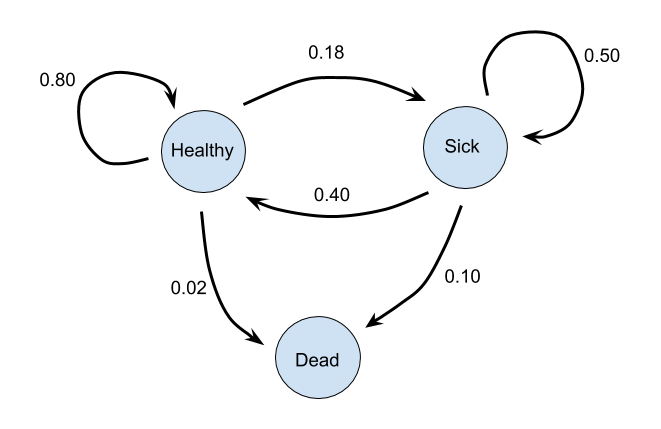

$$ P = \begin{bmatrix} \pi_{1,1} & \pi_{1,2} & \pi_{1,3} \\
                       \pi_{2,1} & \pi_{2,2} & \pi_{2,3} \\
                       \pi_{3,1} & \pi_{3,2} & \pi_{3,3} \end{bmatrix} $$

In [ ]:
pi_11 = 0.8
pi_12 = 0.18
pi_13 = 0.02

pi_21 = 0.4
pi_22 = 0.5
pi_23 = 0.1

pi_31 = 0.0
pi_32 = 0.0
pi_33 = 1.0

P2 = np.array([[pi_11, pi_12, pi_13],
               [pi_21, pi_22, pi_23],
               [pi_31, pi_32, pi_33]])
print(P2)

If you start at any $X_t$ and simulate that system for a long time, what will be the long-run probability of everyone?

In [ ]:
x_10 = 0.90
x_20 = 0.10
x_30 = 0.0
X_0 = np.array([[x_10], [x_20], [x_30]])

Sims2 = 10  # Try 100 and 1000 next
Xmat2 = np.zeros((Sims2, 3))
X_t = X_0
Xmat2[0, :] = X_t.flatten()

for sim in range(1, Sims2):
    X_tp1 = np.dot(P2.T, X_t)
    Xmat2[sim, :] = X_tp1.flatten()
    X_t = X_tp1

print(Xmat2)

## 3. Definitions
We first define a **stochastic matrix** to represent a certain type of conditional distribution. This type of stochastic matrix is a Markov transition matrix. A stochastic matrix is a square matrix $P$ whose entries $\pi_{j,k}\geq 0$ and whose rows sum to one $\sum_{k=1}^K \pi_{j,k} = 1$ and where $J=K$ (square matrix).

$$ P = \begin{bmatrix} \pi_{1,1} & \pi_{1,2} & ...    & \pi_{1,K} \\
                       \pi_{2,1} & \pi_{2,2} & ...    & \pi_{2,K} \\
                       \vdots    & \vdots    & \ddots & \vdots    \\
                       \pi_{J,1} & \pi_{J,2} & ...    & \pi_{J,K} \end{bmatrix} $$
                       
Let a random variable $x_t$ have a discrete, finite set of values it can take on.

$$ \mathcal{X} = [x_1, x_2, ... x_N] $$

$\mathcal{X}$ is the **state space**, and the invidual values $x_n$ are called **state values**. Let $X_t$ be an unconditional distribution over state values $x_n$.

$$ X_t = \begin{bmatrix} Pr(x_1) \\ Pr(x_2) \\ \vdots \\ Pr(x_N) \end{bmatrix} $$

Note that this unconditional distribution at time $t$ could also be written as a population instead of probabilities by multiplying $X_t$ by a scalar.

A **Markov process** is a stochastic process that satisfies the **Markov property**. The Markov property can be summarized as the characteristic that the future distribution of a system is completely determined by the current distribution of a system $X_t$ and the stationary Markov transition matrix $P$.

$$ Pr(x_{k,t+1}) = Pr(x_{k,t+1}|x_{j,t})Pr(x_{j,t}) \quad\iff\quad X_{t+1} = P^T X_t $$

In a Markov process, the Markov transition matrix $P$ represents the conditional probability of $x_{k,t+1}$ tomorrow given $x_{j,t}$ today. In a Markov process, this conditional probability or transition matrix $P$ is constant across time (i.e., stationary, time invariant). This implies that the distribution of the random variable $X_{t+u}$ $u\geq 1$ periods in the future is simply a function of the current distribution $X_t$ and the Markov transition matrix.

$$ Pr(x_{k,t+u}) = \Bigl[\Pi_{v=t}^{t+u-1} Pr(x_{k,v+1}|x_{j,v})\Bigr]Pr(x_{j,t}) \quad\Rightarrow\quad X_{t+u} = \left(P^T\right)^u \: X_t $$

We can calculate the distribution of a random variable at any point in time in the future by simply multiplying the current distribution by the requisite power of the one-period Markov transition matrix. This is exactly what we did in the cell blocks above in Section 2.

Also note here that the distribution $X_{t+u}$ need not be a probability distribution. Or rather $X_t$ can be transformed into a probability distribution by dividing $X_t$ by the requisite scalar.

## 4. Ergodicity
Despite its simplicity, a Markov process characterized by Markov transition matrix $P$ can generate some pretty rich dynamics. As we saw in the 3-state example from Section 2.2, some states can be absorbing and the long-run distribution can be degenerate. It is also true that Markov processes can have multiple long-run distributions or the distribution might cycle between after some time. Another process from Murphy (2012, Fig. 17b) has multiple potential long-run distributions.

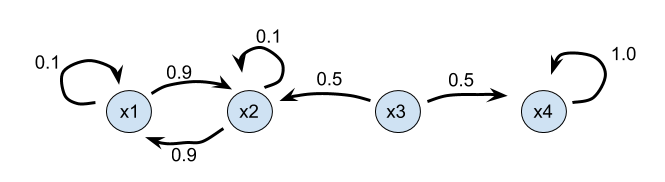

If one starts the system at $x_4$, then the system stays at $x_4$ forever. If one starts the system at either $x_1$ or $x_2$, the long-run distribution will be based on the probabilities between the two states. If one starts the system at $x_3$, the long run distribution of the system will be a coin flip betwee the degenerate distribution at $x_4$ and the distribution based on the probabilities between $x_1$ and $x_2$.

An important property for a Markov transition matrix $P$ that helps guarantee the existence of a unique long-run distribution is that each state be reachable after some number of periods from any other state. This means no absorbing states. A Markov transition matrix with this property is called **irreducible**.

A Markov transition matrix is said to be **ergodic** if it has the properties of being **aperiodic** and **non-null recurrent**. [See Murphy (2012, pp. 600-601).]

Theorem: Every irreducible (singly connected), ergodic Markov chain has a limiting distribution $\textbf{V}$, its unique **stationary distribution**.

$$ \textbf{V} = P^T\textbf{V} $$

The stationary distribution $\textbf{V}$ is sometimes called the **ergodic distribution**. It means that if $X_t = \textbf{V}$, then $X_{t+1} = \textbf{V}$.

The theorem gives you conditions in which the stationary distribution will exist and will be unique. The stationary distribution tells you what the distribution will look like in the long run. The Markov transition matrix $P$ lets you calculate what the distribution will be in any point in time $t+u$ given the current distribution $X_t$.

There are two ways to calculate the stationary distribution. When the theorem holds true, both methods give the same answer. When the theorem does not hold true, both methods might not give the same answer.

### 4.1. Eigenvalue-eigenvector decomposition
The stationary equation $\textbf{V} = P^T\textbf{V}$ can be rewritten in the classic eigenvalue-eigenvector decomposition form for the matrix $P^T$.

$$ \left(P^T - \lambda\textbf{I}\right)\textbf{V} = \textbf{0} \quad\text{where}\quad \lambda=1$$

In this equation $\lambda$ is a vector of eigenvalues and $\textbf{V}$ is a matrix of eigenvectors. The $i$th column of the matrix of eigenvectors is the eigenvector associated with the $i$th eigenvalue $\lambda_i$. The stationary distribution of the system is therefore the eigenvector $\textbf{V}$ associated with the eigenvalue equal to $\lambda_i=1$. Because the eigenvector is only true up to a constant, you will likely need to normalize it to make its entries sum to 1.

In [ ]:
pi_11 = 0.8
pi_22 = 0.5
P = np.array([[pi_11, 1 - pi_11], [1 - pi_22, pi_22]])
print(P)
print()
print(P.T)

In [ ]:
import numpy.linalg as LA

eigvals, eigvecmat = LA.eig(P.T)
print(eigvals)
print(eigvecmat)
one_ind = np.argwhere(eigvals == 1).flatten()
print(one_ind)
eigvec = eigvecmat[:, one_ind] / eigvecmat[:, one_ind].sum()
stat_dist = eigvec
print(stat_dist)

### 4.2. Power tranformation of P matrix
Another way to find the stationary distribution of a Markov process is to iterate on the current distribution until it is no longer changing to an arbitrary degree of precision. This is equivalent to multiplying the initial distribution by the transition matrix raised to an arbitrarily high power (analogous to going an arbitrarily high number of periods into the future).

In [ ]:
X_0 = np.array([[1.0], [0.0]])
X_stat = np.dot(LA.matrix_power(P.T, 100), X_0)
print(X_stat)

## 5. Simulation
How would you simulate a Markov process? And how is that different from simulating a continuous stochastic process? Let's use a 3-state Markov process to see how it can be simulated. Assume that the state vector for a 3-state Markov process is $x=[1.3, 3.0, 4.8]$ and the Markov transition probability matrix is $P$ the following.

$$ P = \begin{bmatrix}
           \pi_{1,1} & \pi_{1,2} & \pi_{1,3} \\
           \pi_{2,1} & \pi_{2,2} & \pi_{2,3} \\
           \pi_{3,1} & \pi_{3,2} & \pi_{3,3} \end{bmatrix} =
       \begin{bmatrix}
           0.81 & 0.13 & 0.06 \\
           0.23 & 0.54 & 0.23 \\
           0.06 & 0.13 & 0.81 \end{bmatrix} $$

Note that this implies that there are only three values that $x_t$ can take on $x_t\in\{1.3, 3.0, 4.8\}$. We can simulate a time series for $x_t$ from the Markov process defined by $P$ and an initial condition $x_0$ by drawing a uniform distribution $U(0,1)$ of random shocks and using those random draws as the coin flip that tells you to which state the random variable will be jumping. Assume that $x_0=3$ the middle value of the state vector $x$.

In [ ]:
import scipy.stats as sts

P = np.array([[0.81, 0.13, 0.06], [0.23, 0.54, 0.23], [0.06, 0.13, 0.81]])
x_vals = np.array([1.3, 3.0, 4.8])
T5 = 100
x_0 = x_vals[1]
x_vec = np.zeros(T5)
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T5, random_state=25)

x_vec = np.zeros(T5)
x_t = x_0
xt_ind = 1
for t_ind in range(T5):
    # Calculate new index and new value
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[xt_ind, :])).min()
    x_tp1 = x_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    # Update the current value and its index in the loop
    x_t = x_tp1
    xt_ind = xtp1_ind

In [ ]:
# Plot the time series of x_t
plt.plot(np.arange(1, T + 1), x_vec, '-')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'3-state Markov process simulated time series', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$x_t$')

## 6. Examples of Markov model uses
* Page rank
* Text prediction
* Demographics
* MCMC
* Approximating AR(1)

### 6.1. Markov approximation of AR(1)
An AR(1) process (autogregressive process of order 1) is a continuous random variable $z_t$ that is modeled as having some random component $\varepsilon_t$ and a component based on the variable's previous value $z_{t-1}$. Thus, we call this process autoregressive.

$$ z_t = \rho z_{t-1} + (1 - \rho)\mu + \varepsilon_t \quad\text{s.t.}\quad \rho\in(-1,1) \quad\text{and}\quad \varepsilon_t\sim N(0,\sigma) $$

In exercise (1a) of [Problem Set 4](https://github.com/UC-MACSS/persp-research-econ_Spr19/blob/master/Assignments/PS4/PS4.pdf), you will simulate this continuous AR(1) process.

This AR(1) process can be approximated by an $N$-state Markov process. Exercises (1b) through (1f) of [Problem Set 4](https://github.com/UC-MACSS/persp-research-econ_Spr19/blob/master/Assignments/PS4/PS4.pdf) have you estimate the values of a 5-state Markov process to closely approximate a calibration of the AR(1) process above. The following three methods describe the most common methods for approximating a continuous AR(1) process with a discrete Markov process. All three methods are coded up in the Python module [`ar1_approx.py`](https://github.com/UC-MACSS/persp-research-econ_Spr19/blob/master/Notebooks/Markov/ar1_approx.py).

#### 6.1.1. Adda and Cooper method
Adda and Cooper (2003, pp. 56-60) provide a method similar to that of [Problem Set 4](https://github.com/UC-MACSS/persp-research-econ_Spr19/blob/master/Assignments/PS4/PS4.pdf) for estimating the Markov Transition matrix $P$. However, rather than simulation, they use the discretized support points of $z_t$ and the continuous AR(1) distribution to solve for each transition probability as the appropriate integral of the normal distribution of $z_{t+1}$.
\begin{equation*}
  z_{t+1}\sim N\bigl(\rho z_t + (1-\rho)\mu, \sigma\bigr)
\end{equation*}

The code for this approach is in the Python module [`ar1_approx.addacooper()`](https://github.com/UC-MACSS/persp-research-econ_Spr19/blob/master/Notebooks/Markov/ar1_approx.py).

#### 6.1.2. Tauchen and Hussey method
Tauchen (1986) showed that a discrete Markov process can approximate a continuous AR(1) process. Tauchen and Hussey (1991) uses Gaussian quadrature to choose an efficient number of nodes and weights to most closely approximate the integral required to estimate the appropriate transition probabilities and bin cutoffs. The code for this approach is in the Python module [`ar1_approx.tauchenhussey()`](https://github.com/UC-MACSS/persp-research-econ_Spr19/blob/master/Notebooks/Markov/ar1_approx.py).

#### 6.1.3. Rouwenhurst method
The method of Tauchen and Hussey (1991) introduces increased approximation error for AR(1) processes that have a persistence parameter that is close to 1 in absolute value $1 - |\rho|<\epsilon$, where $\epsilon$ could be as large as 0.05. This is true for some stochastic processes used in macroeconomic models. Rouwenhorst (1995) introduces a method for calculating the Markov transition matrix that is robust to high-persistence AR(1) processes. The code for this approach is in the Python module [`ar1_approx.rouwen()`](https://github.com/UC-MACSS/persp-research-econ_Spr19/blob/master/Notebooks/Markov/ar1_approx.py).

### 6.2. Demographics
Assume that the population distribution by age $\omega_{s,t}$ evolves according to the following equations that are functions of fertility rates $f_s$, mortality rates $\rho_s$, immigration rates $i_s$, and the current population distribution $\omega_{s,t}$.

$$ \omega_{1,t+1} = (1-\rho_0)\sum_{s=1}^S f_s\omega_{s,t} + i_1\omega_{1,t} \quad\forall t $$

$$ \qquad\qquad\qquad\qquad \omega_{s+1,t+1} = (1-\rho_s)\omega_{s,t} + i_{s+1}\omega_{s+1,t} \quad\forall t\quad\text{and}\quad 1\leq s\leq S-1 $$

These equations constitute a law of motion for the population distribution by age $s$ over time $t$.

$$ (1 + g_{t+1})\hat{\omega}_{t+1} = \Omega\hat{\omega}_t $$

$$ (1 + g_{t+1})\begin{bmatrix} \hat{\omega}_{1,t+1} \\ \hat{\omega}_{2,t+1} \\ \hat{\omega}_{3,t+1} \\ \vdots \\ \hat{\omega}_{S-1,t+1} \\ \hat{\omega}_{S,t+1} \end{bmatrix} =
\begin{bmatrix} (1-\rho_0)f_1 + i_1 & (1-\rho_0)f_2 & (1-\rho_0)f_3 & ... & (1-\rho_0)f_{S-1} & (1-\rho_0)f_S \\
                1-\rho_1 & i_2 & 0 & ... & 0 & 0 \\
                0 & 1-\rho_2 & i_3 & ... & 0 & 0 \\
                \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                0 & 0 & 0 & ... & i_{S-1} & 0 \\
                0 & 0 & 0 & ... & 1-\rho_{S-1} & i_S \end{bmatrix}
\begin{bmatrix} \hat{\omega}_{1,t} \\ \hat{\omega}_{2,t} \\ \hat{\omega}_{3,t} \\ \vdots \\ \hat{\omega}_{S-1,t} \\ \hat{\omega}_{S,t}\end{bmatrix} $$

One can use the eigenvalue-eigenvector decomposition to find the steady-state of the population distribution.

$$ (1 + g)\omega = \Omega\omega $$

Or one can simulate the distribution from the current state to the steady-state.

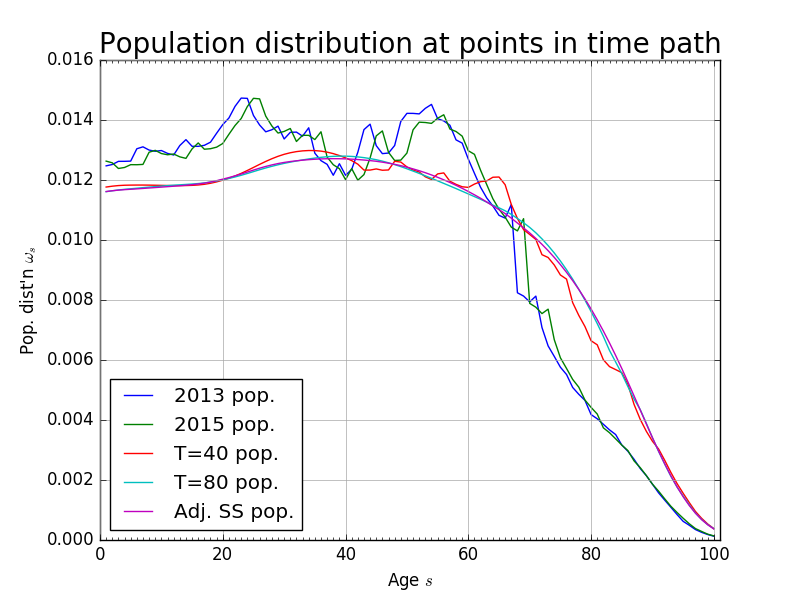

## 7. Hidden Markov Models or Markov Switching Models
Hidden Markov models are also called Markov Switching Models. These are models in which the state vector of Markov states $\mathcal{X} = \{x_1, x_2, ... x_N\}$ is not observable. However, observable data $Y_t$ is generated as a function of the hidden state of $X_t$, and observable data $Y_t$ can be modeled as being generated from a probability distribution conditional on $X_t$.

$$ Pr(Y_t=Y|X_t=x_n) $$

Another way of saying this is that the model or distribution generating $Y_t$ can change discretely based random transitions between a finite number of states. In this equation, $X_t$ is a Markov process that is not observable. However, the observable data might exhibit discrete clumps that might help us identify the underlying states and their transition probabilities. These models are also called regime switching models.

Hidden Markov models are well suited for modeling data that exhibit clumps of patterns. Below is a figure of a 3-state hidden Markov process. The data are generated from 3 different potential states $X_t$ that are not directly observable. These states are circled. Within each state, the observable data are generated by a 2-dimensional Gaussian (Normal) distribution.

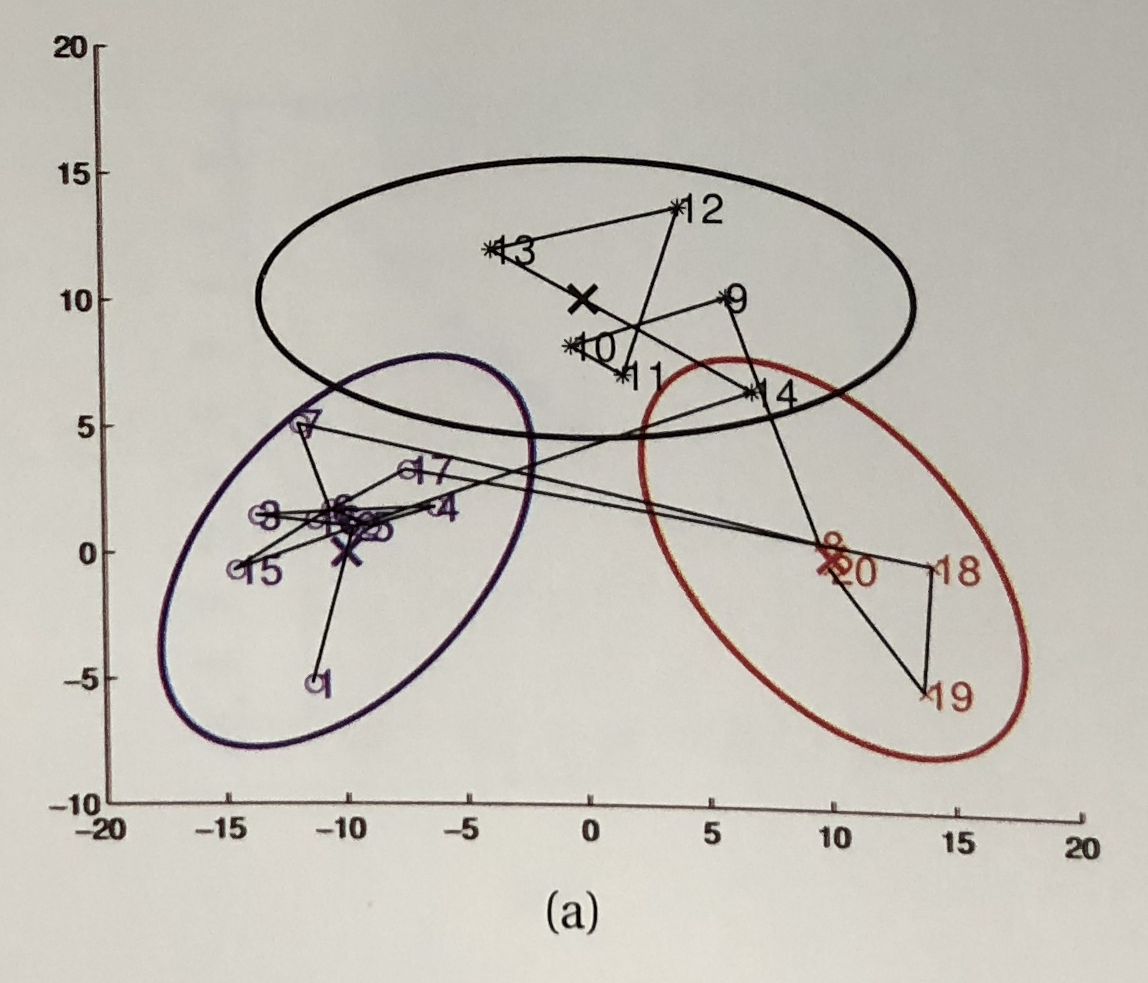

Examples of applications of HMM models are:
* Health care costs: We transtion between different unobservable states of health, each of which generate a different stream of observable healthcare expenditures.
* Speech recognition: audible speech has observable frequency patterns, word-to-word patterns and transitions are no immediately observable and must be inferred.
* Gene finding
* Protein sequence alignment

Many sophisticated learning algorithms for estimating HMM's. All of these maximize some type of likelihood. See Murphy (2012, pp. 608-624)

### 7.1. Health care expenditures
Healthcare expenditures are a perfect process to model as a hidden Markov model. The following data are from a sample of monthly health care expenditures--both personal expenditures and the expenditures of the insurance provider--over a period of 24 months. The following figure counts the number of months with zero expenditures in each of these 24-month observations and shows the fraction of observations with each possible number of zero-expenditure months. It is notable that the most common observation is 24 months (the entire period) with zero expenditures, and that a large portion of the data have most of their months with zero expenditures. This is suggestive that health care expenditures come in clumps.

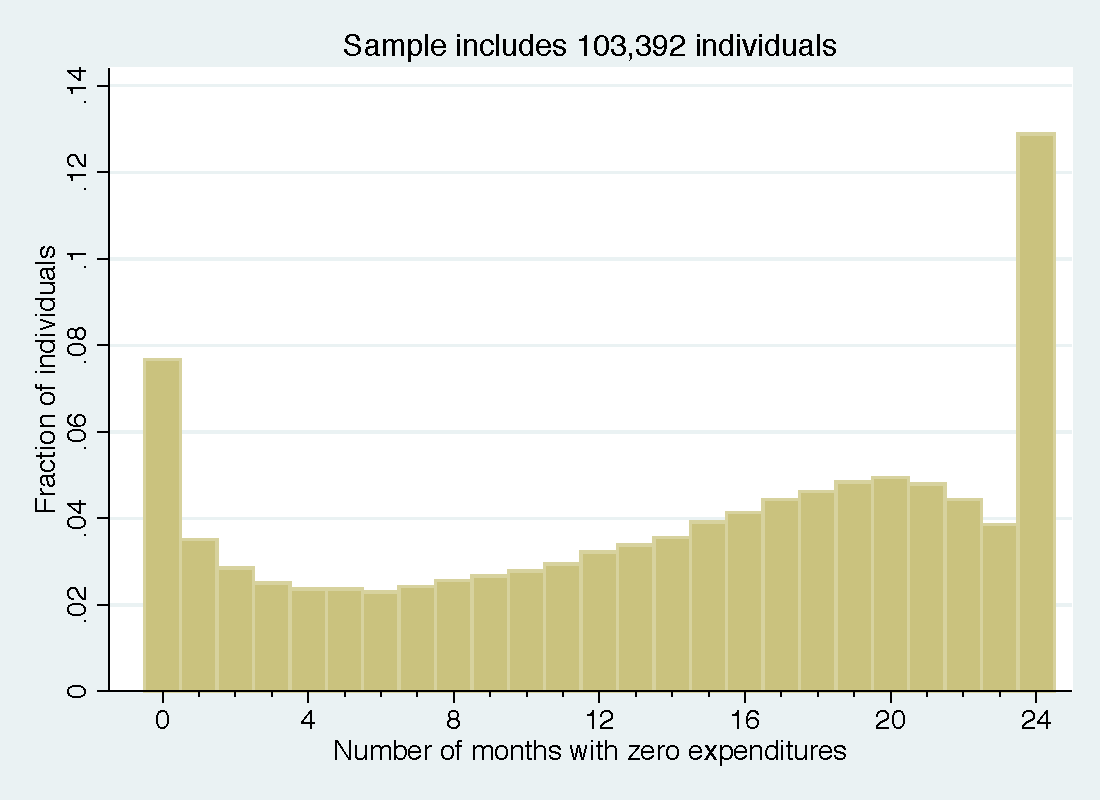

In some unpublished work in progress, Evans and Humpherys (2014) assumes that the hidden Markov process generating the health care expenditures data is the following.

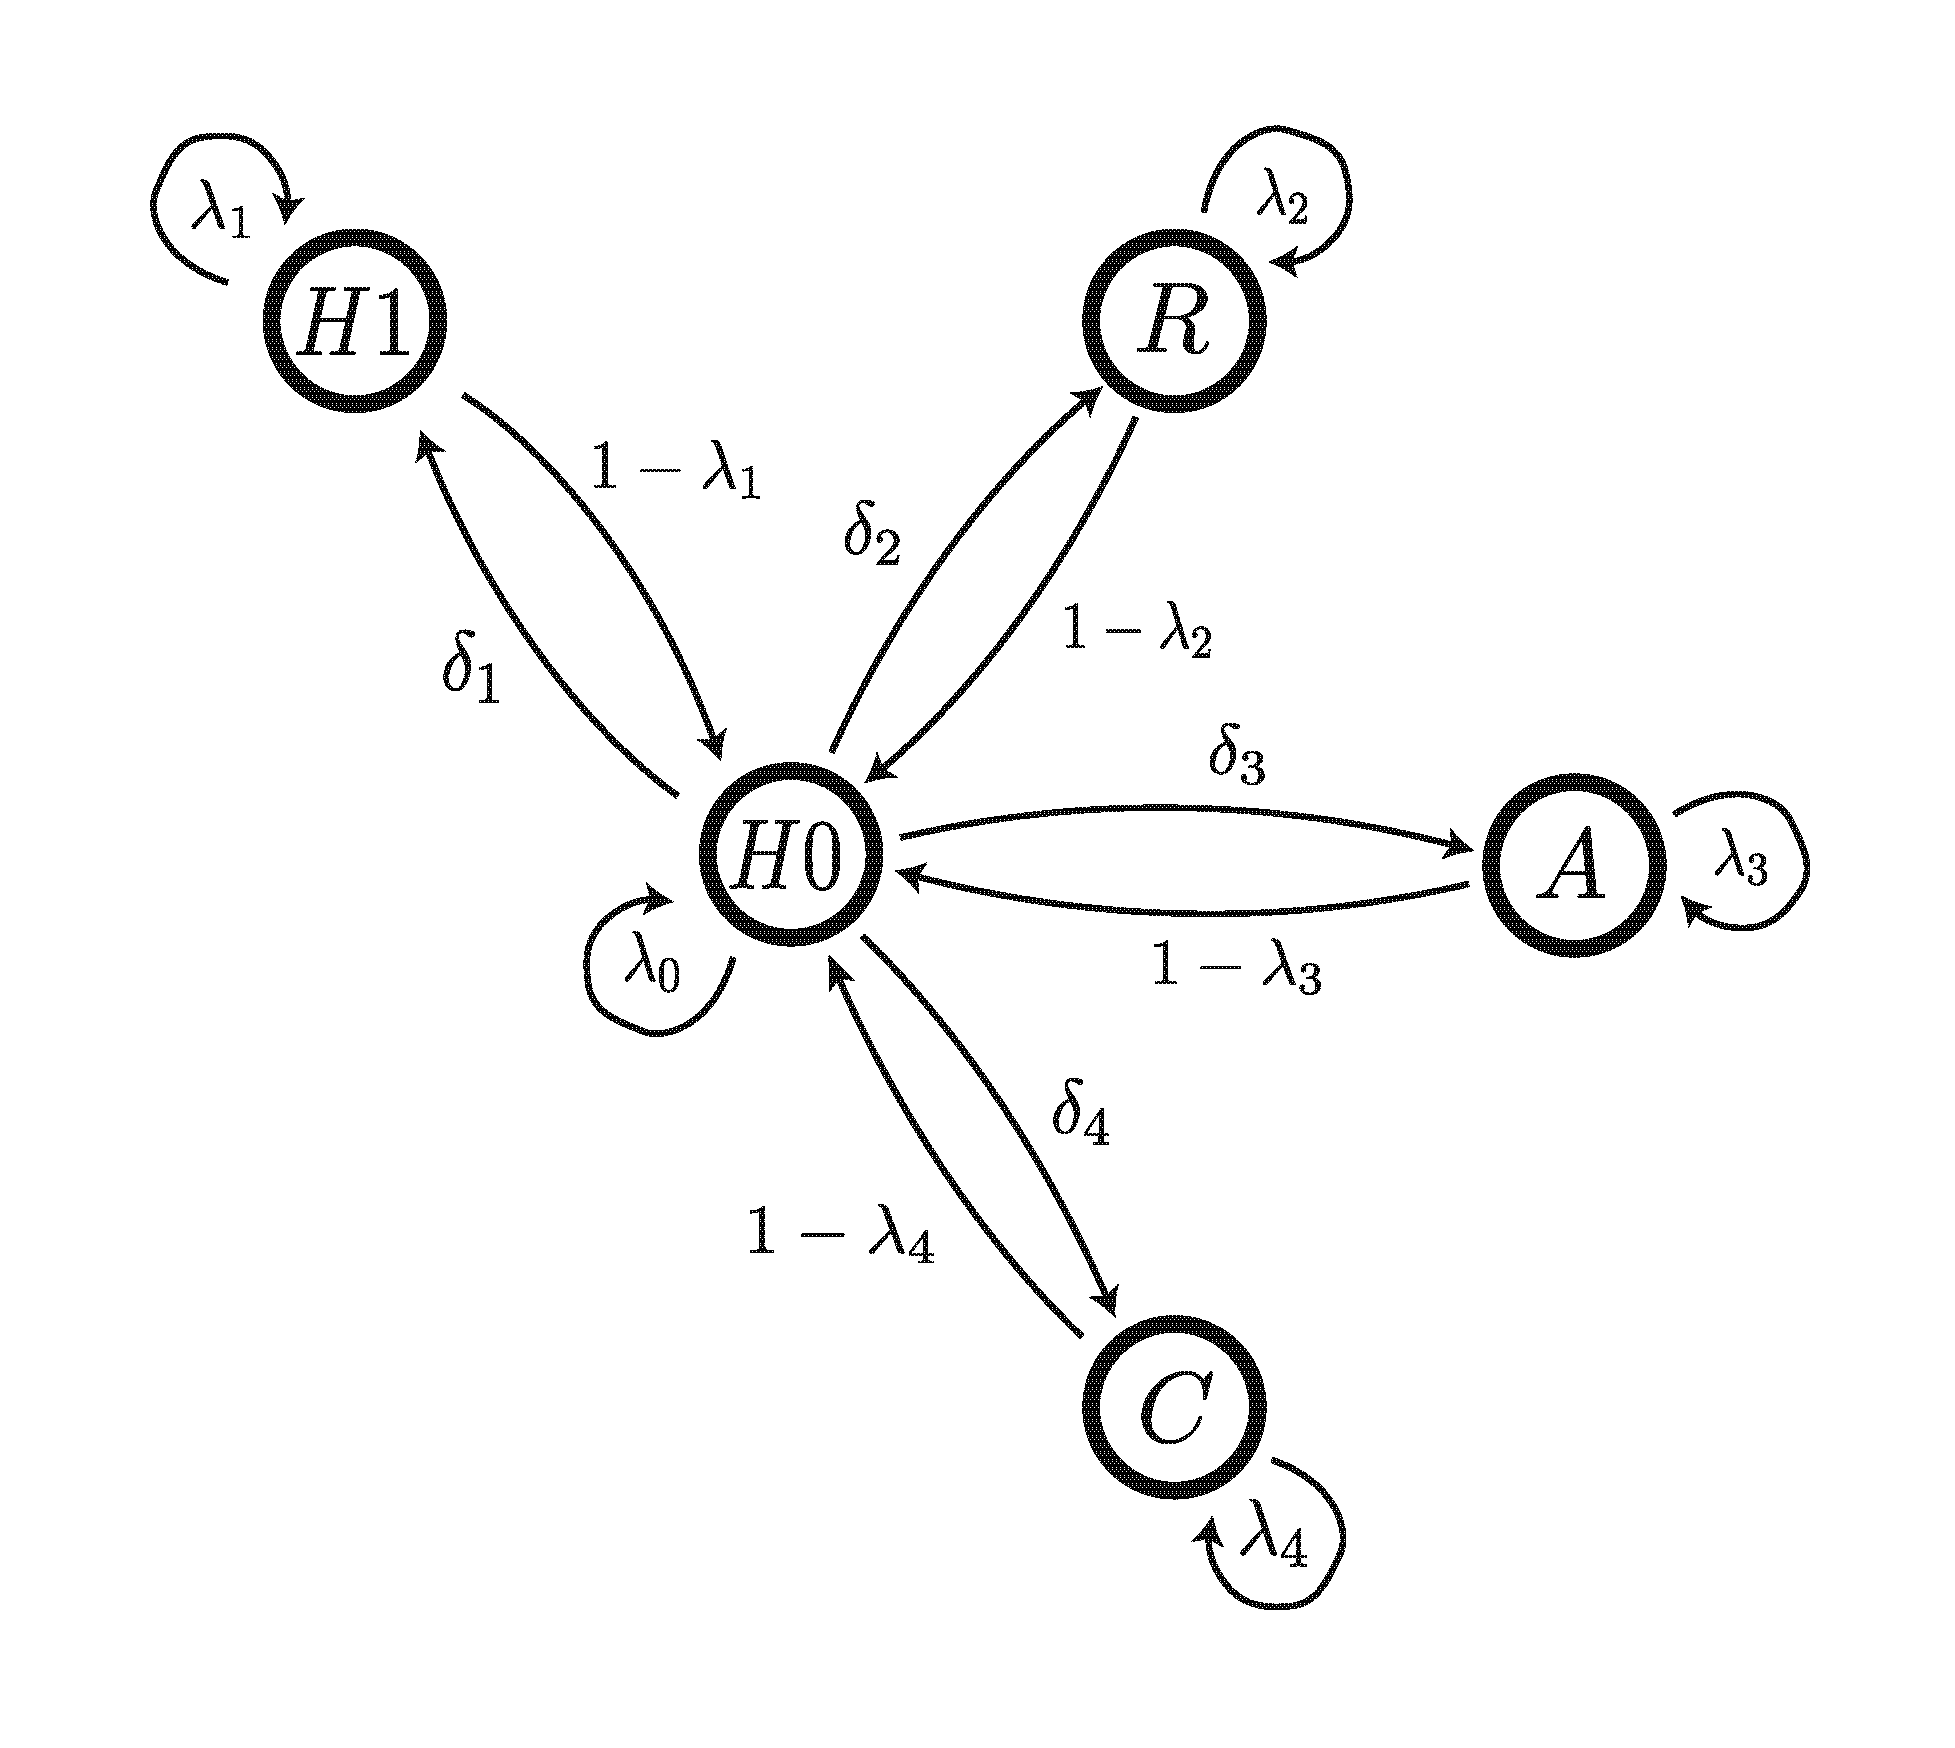

$$ Pr\bigl(X_{t+1}|X_t\bigr) = P(\lambda,\delta) = \begin{bmatrix}
                                                       \lambda_0 & \delta_1 & \delta_2 & \delta_3 & \delta_4 \\
                                                       1 - \lambda_1 & \lambda_1 & 0 & 0 & 0 \\
                                                       1 - \lambda_2 & 0 & \lambda_2 & 0 & 0 \\
                                                       1 - \lambda_3 & 0 & 0 & \lambda_3 & 0 \\
                                                       1 - \lambda_4 & 0 & 0 & 0 & \lambda_4 \end{bmatrix} $$

Evans and Humpherys (2014) use positive expenditure spell length and zero expenditure spell length to identify and estimate the probabilities in the $P$ transition matrix. We get a really nice fit to the data.

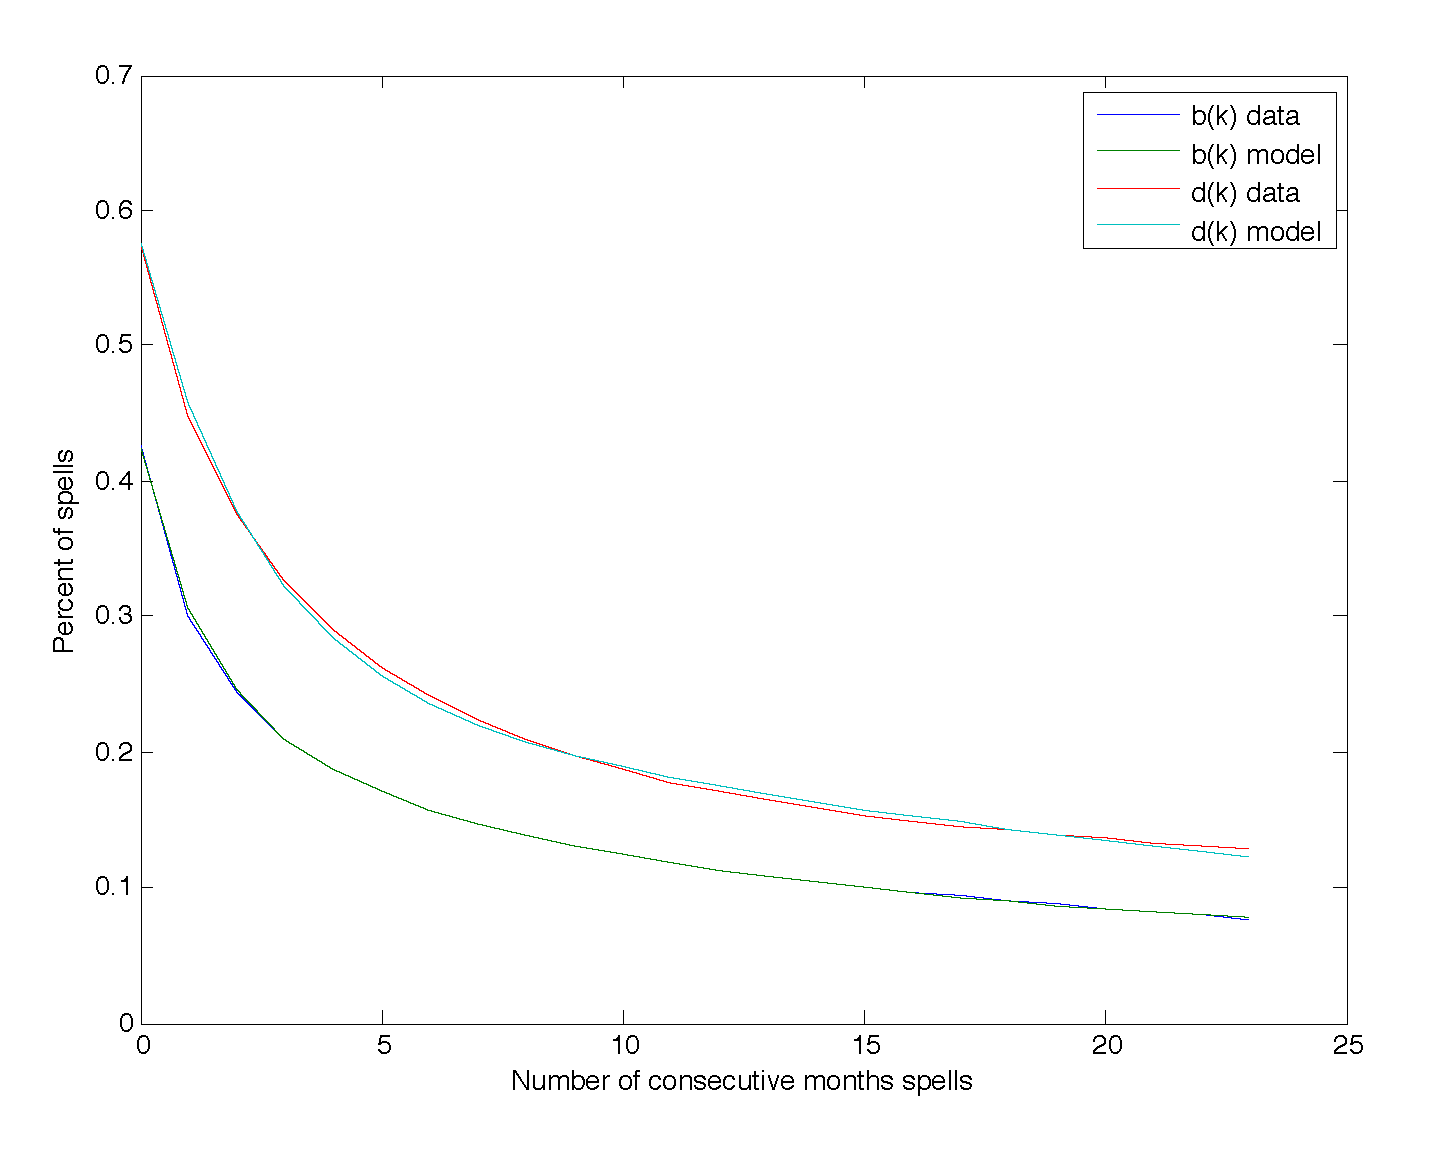

Furthermore, our transition matrix $\hat{P}$ allows us to infer the type of a spell (Regular, Acute, Chronic) of health care expenditures based on the length of the positive expenditure spell. This can be computed for both complete spells and for censored spells that either start at the beginning of the sample (left censored) or finish at the end of the sample (right censored).

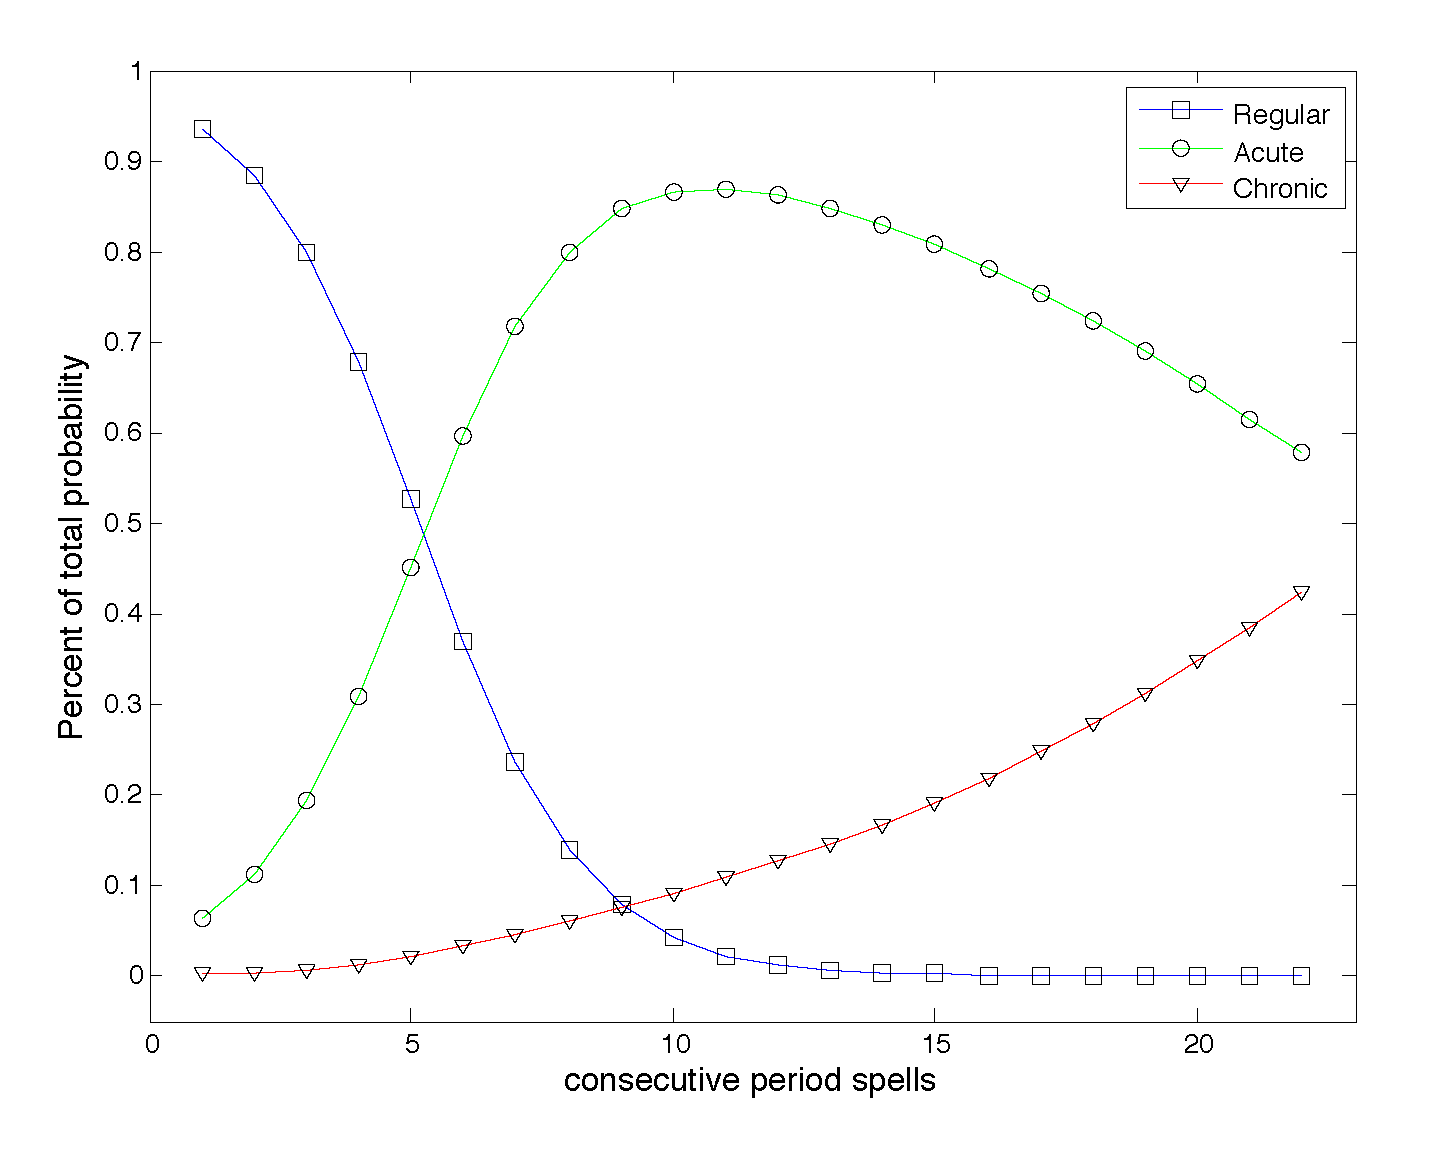

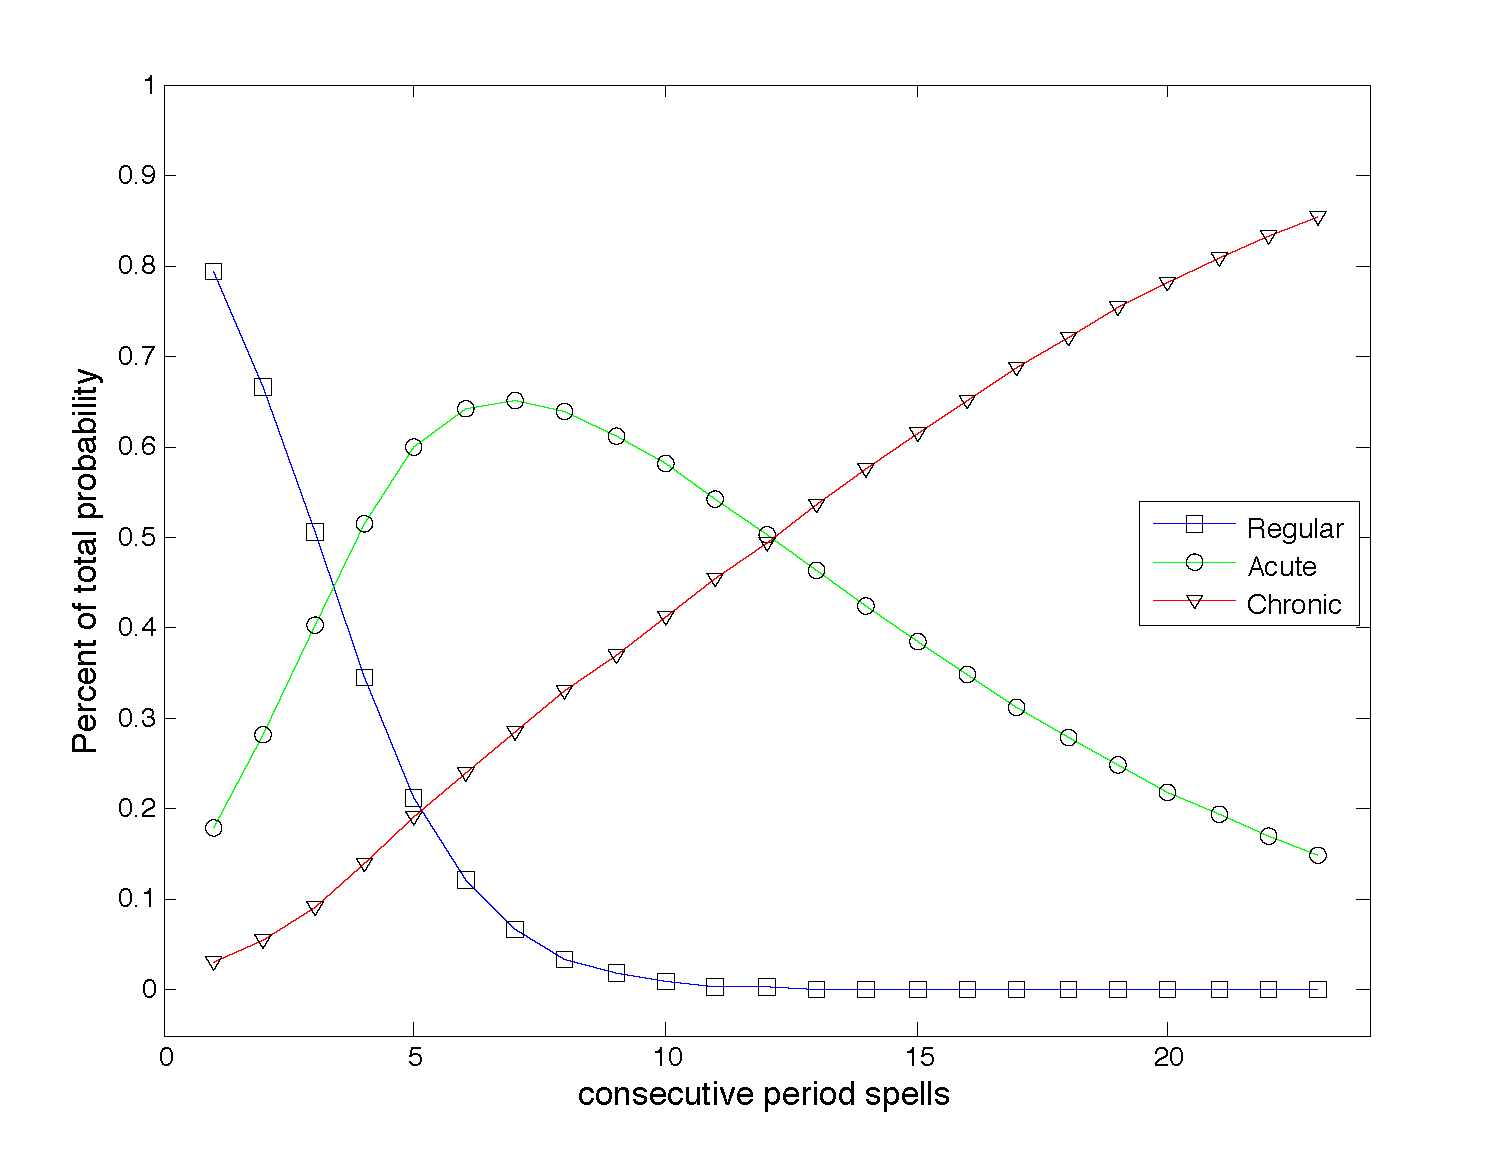

## 8. References
* Adda, Jerome and Russell Cooper, *Dynamic Economics: Quantitative Methods and Applications*, MIT Press, 2003.
* Evans, Richard W. and Jeffrey Humpherys, "A Hidden Markov Model of Health Expenditure Dynamics", unpublished (2014).
* Murphy, Kevin P., *Machine Learning: A Probabilistic Perspective*, MIT Press (2012).
* Rouwenhorst, K. Geert, "Asset Pricing Implications of Equilibrium Business Cycle Models," in *Frontiers of Business Cycle Research*, ed. Thomas F. Cooley, Princeton University Press, pp. 294-330 (1995).
* Tauchen, George, "Finite State Markov-chain Approximations to Univariate and Vector Autoregressions", *Economics Letters*, 20:2, pp. 177-181 (1986).
* Tachen, George and Robert Hussey, "Quadrature-based Methods for Obtaining Approximate Solutions to Nonlinear Asset Pricing Models," *Econometrica*, 59:2, pp. 371-396 (March 1991).